# Minor Project 

In [5]:
!pip install kagglehub
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# BASIC EDA(Exploratory Data Analysis)

In [6]:
ph = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")
print("Dataset downloaded to:", ph)

file = [f for f in os.listdir(ph) if f.endswith(".csv")][0]   # auto-select CSV
df = pd.read_csv(os.path.join(ph, file))


Dataset downloaded to: C:\Users\Taksh\.cache\kagglehub\datasets\nehalbirla\vehicle-dataset-from-cardekho\versions\4


In [4]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [9]:
CURRENT_YEAR = 2025
df['Car_Age'] = CURRENT_YEAR - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Feature Engineering

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Model Building

In [11]:
X = df_encoded.drop('Selling_Price', axis=1) # Features
y = df_encoded['Selling_Price']             # Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 240 samples
Testing data size: 61 samples


# Model Selection

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("\nLinear Regression Model training complete.")


Linear Regression Model training complete.


# Model Evaluation

In [19]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): $1.22
Mean Squared Error (MSE): $3.48
R-squared Score (R²): 0.8490


# Visual Representing 

In [20]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

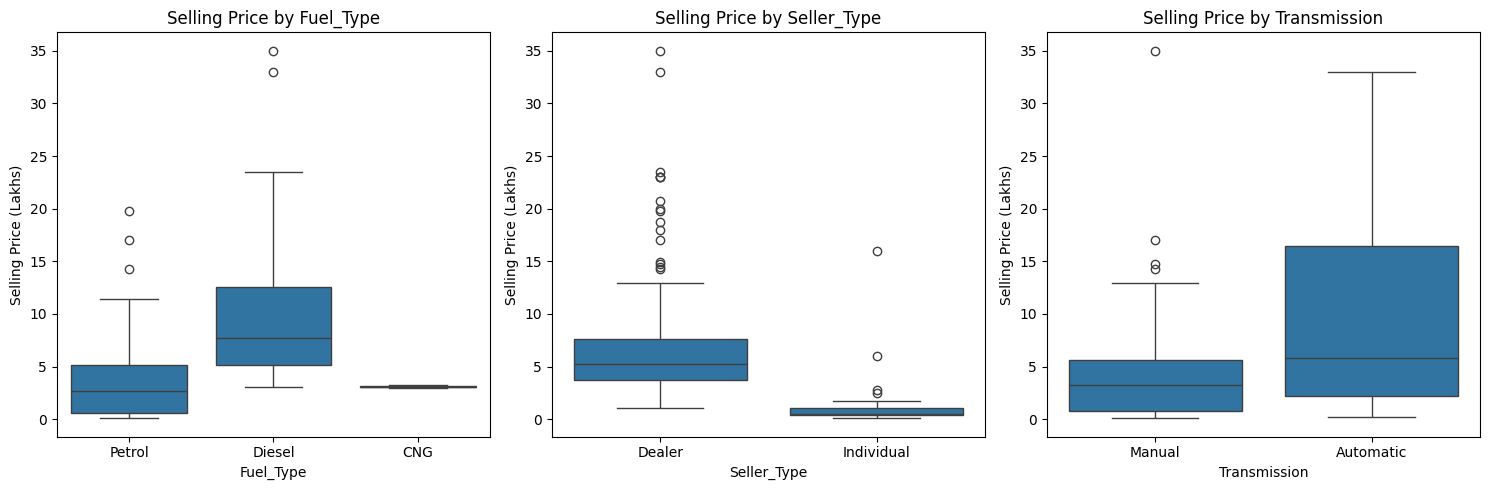

In [21]:
# Plot 1: Box Plots for Categorical Variables vs. Selling Price
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='Selling_Price', data=df)
    plt.title(f'Selling Price by {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Selling Price (Lakhs)', fontsize=10)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

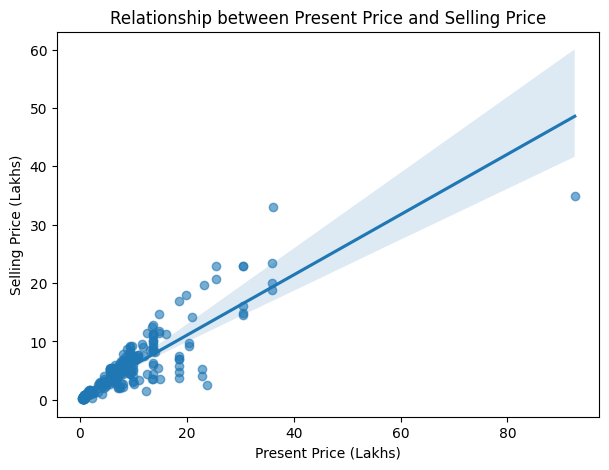

In [22]:
# Plot 2: Regression Plot for Present Price vs. Selling Price
plt.figure(figsize=(7, 5))
sns.regplot(x='Present_Price', y='Selling_Price', data=df, scatter_kws={'alpha':0.6})
plt.title('Relationship between Present Price and Selling Price')
plt.xlabel('Present Price (Lakhs)')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

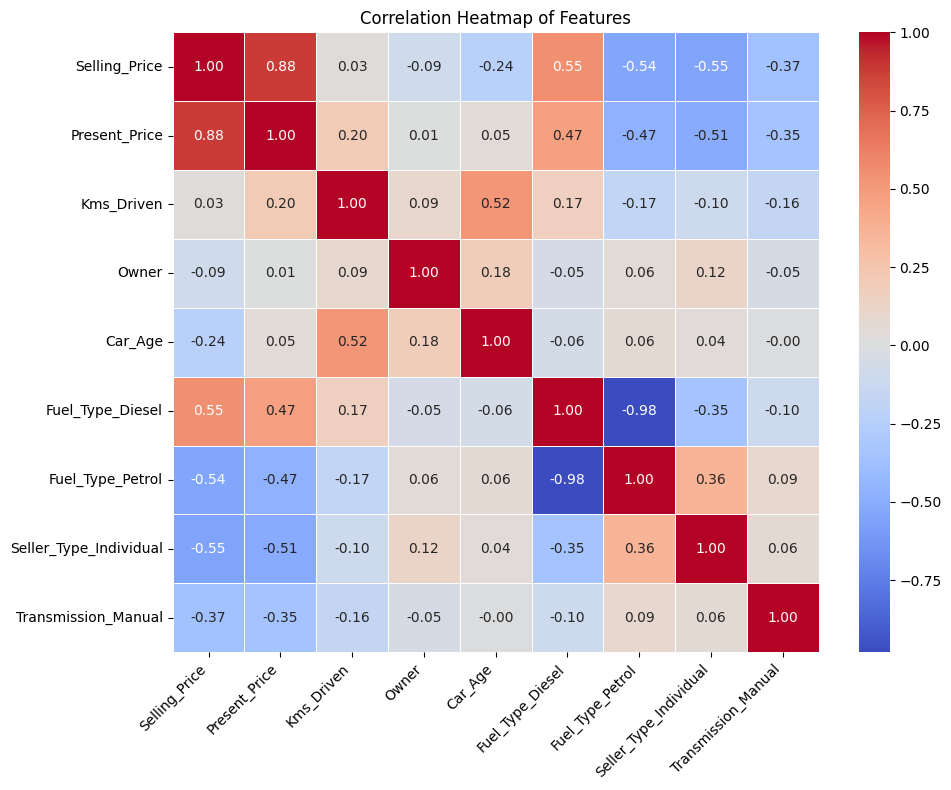

In [23]:
# Plot 3: Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

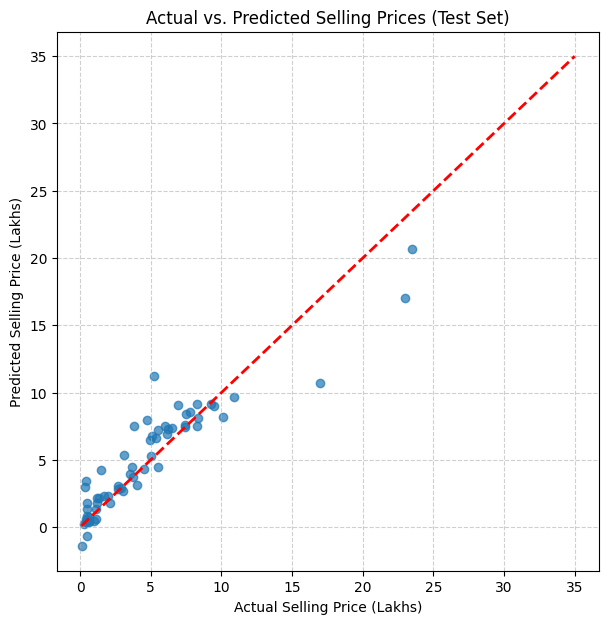

In [24]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.7)
# Plot the ideal line where Actual = Predicted (y=x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.title('Actual vs. Predicted Selling Prices (Test Set)')
plt.xlabel('Actual Selling Price (Lakhs)')
plt.ylabel('Predicted Selling Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# -----------------------------------------END------------------------------------------